In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#Task 1. Imports, links, and loading
## Load dataset into dataframe and read first five row
df=pd.read_csv("tiktok_dataset.csv")
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [16]:
# Get the shape of the data

df.shape

(19382, 12)

In [17]:
# Get the size of the data

df.size

232584

In [18]:
## Get basic information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [23]:
#Get data types of columns
df.dtypes


#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

In [22]:
# Generate basic descriptive statistics
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [25]:
# Check for missing values
missing_value=df.isnull().sum()
missing_value

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [26]:
missing_per=df.isnull().sum()/df.shape[0]*100
missing_per

#                           0.000000
claim_status                1.537509
video_id                    0.000000
video_duration_sec          0.000000
video_transcription_text    1.537509
verified_status             0.000000
author_ban_status           0.000000
video_view_count            1.537509
video_like_count            1.537509
video_share_count           1.537509
video_download_count        1.537509
video_comment_count         1.537509
dtype: float64

<AxesSubplot:>

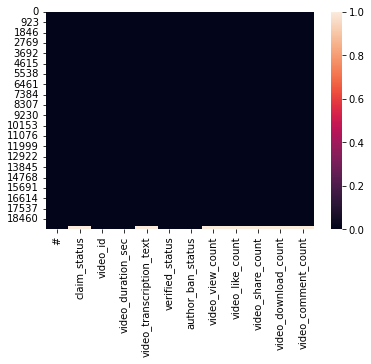

In [28]:
sns.heatmap(df.isnull())

<AxesSubplot:>

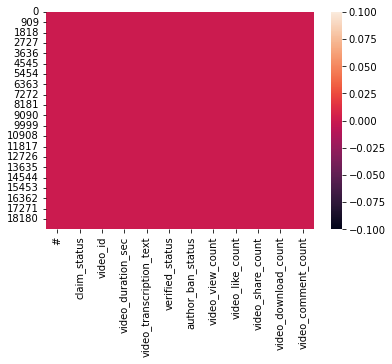

In [35]:
# Drop rows with missing values
drop_rows=df.dropna(axis=0)
sns.heatmap(drop_rows.isnull())

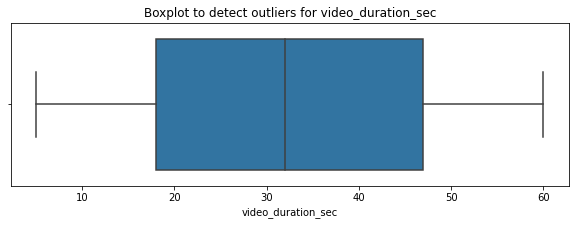

In [42]:
# Create a boxplot to visualize distribution of `video_duration_sec`

plt.figure(figsize=(10,3))
plt.title('Boxplot to detect outliers for video_duration_sec')
sns.boxplot(x=df['video_duration_sec'])
plt.show()

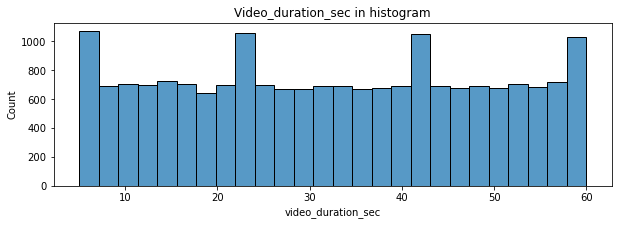

In [43]:
plt.figure(figsize=(10,3))
plt.title("Video_duration_sec in histogram")
sns.histplot(df['video_duration_sec'])
plt.show()

# All videos are 5-60 seconds in length, and the distribution is uniform

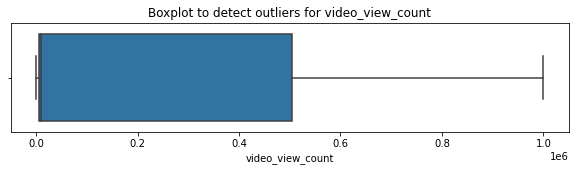

In [44]:
plt.figure(figsize=(10,2))
plt.title('Boxplot to detect outliers for video_view_count')
sns.boxplot(x=df['video_view_count'])
plt.show()

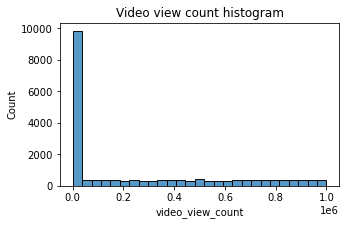

In [45]:
plt.figure(figsize=(5,3))
sns.histplot(df['video_view_count'])
plt.title('Video view count histogram');


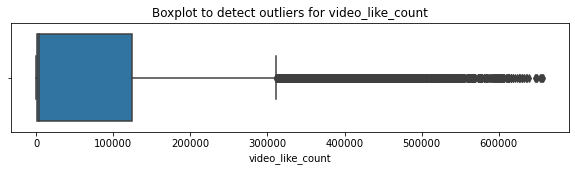

In [46]:
plt.figure(figsize=(10,2))
plt.title('Boxplot to detect outliers for video_like_count')
sns.boxplot(x=df['video_like_count'])
plt.show()

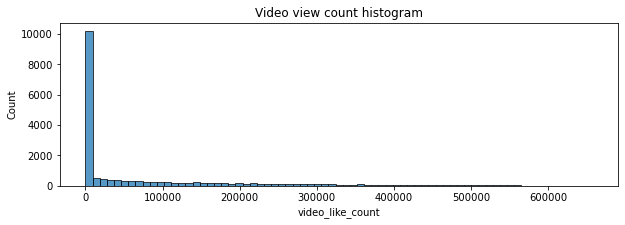

In [48]:
plt.figure(figsize=(10,3))
sns.histplot(df['video_like_count'])
plt.title('Video view count histogram');

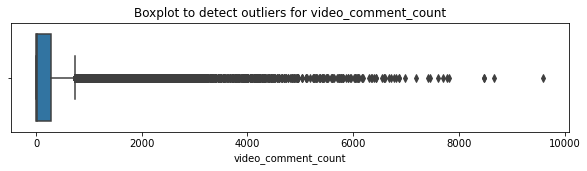

In [49]:
plt.figure(figsize=(10,2))
plt.title('Boxplot to detect outliers for video_comment_count')
sns.boxplot(x=df['video_comment_count'])
plt.show()

Text(0.5, 1.0, 'Video view comment histogram')

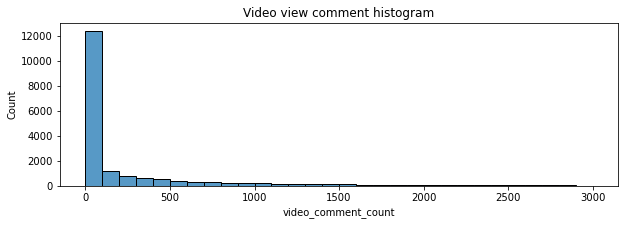

In [54]:
plt.figure(figsize=(10,3))
sns.histplot(df['video_comment_count'], bins=range(0,(3001),100))
plt.title('Video view comment histogram')

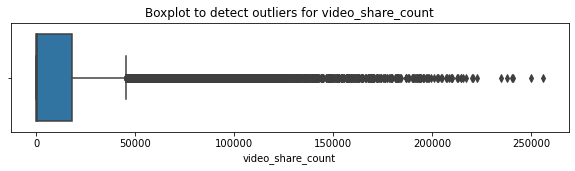

In [55]:
# Create a boxplot to visualize distribution of `video_share_count`

plt.figure(figsize=(10,2))
plt.title('Boxplot to detect outliers for video_share_count')
sns.boxplot(x=df['video_share_count'])
plt.show()


Text(0.5, 1.0, 'Video share comment histogram')

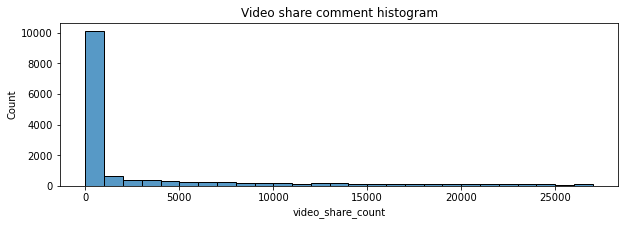

In [59]:
# Create a histogram plot to visualize distribution of `video_share_count`

plt.figure(figsize=(10,3))
sns.histplot(df['video_share_count'], bins=range(0,(27001),1000))
plt.title('Video share count histogram')

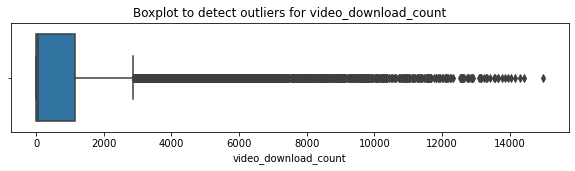

In [61]:
# Create a boxplot to visualize distribution of `video_download_count`
plt.figure(figsize=(10,2))
plt.title('Boxplot to detect outliers for video_download_count')
sns.boxplot(x=df['video_download_count'])
plt.show()


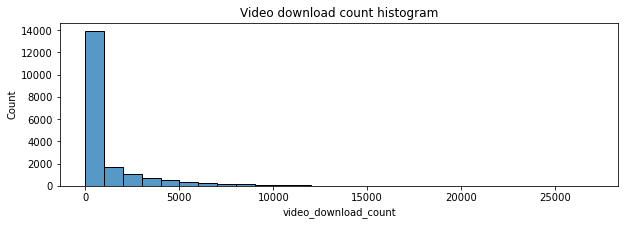

In [64]:
# Create a histogram to visualize distribution of `video_download_count`

plt.figure(figsize=(10,3))
sns.histplot(df['video_download_count'], bins=range(0,(27001),1000))
plt.title('Video download count histogram')
plt.show()

#Exemplar response:
#      The majority of videos were downloaded fewer than 500 times, but some were downloaded over 12,000 times.
#       Again, the data is very skewed to the right.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='video_like_count'>

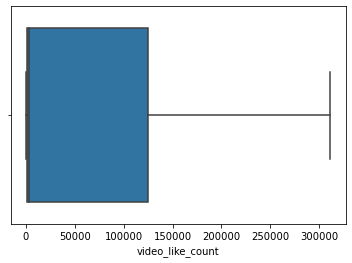

In [91]:
# If only one column in outlier data so use this method otherwise second method is below:

percentile25 = df["video_like_count"].quantile(0.25)
percentile75 = df["video_like_count"].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr

df.loc[df["video_like_count"] > upper_limit, "video_like_count"] = upper_limit

sns.boxplot(df['video_like_count'])

In [148]:
# multiple column remove outlier:
count_outlier=['video_like_count',
              'video_share_count',
              'video_download_count',
              'video_comment_count']

def removeoutlier(df):
    for i in count_outlier:
        print(i)
        if(((df[i].dtype)=="float64") | ((df[i].dtype)=="int64")):
            iqr=df[i].quantile(0.75)-df[i].quantile(0.25)
            lwr=df[i].quantile(0.25)-(1.5*iqr)
            upr=df[i].quantile(0.75)+(1.5*iqr)
            df.loc[df[i]<lwr,i]=lwr
            df.loc[df[i]>upr,i]=upr
        else:
            df[i]=df[i]
removeoutlier(df)  
    
    
    

video_like_count
video_share_count
video_download_count
video_comment_count


<AxesSubplot:xlabel='video_like_count', ylabel='Count'>

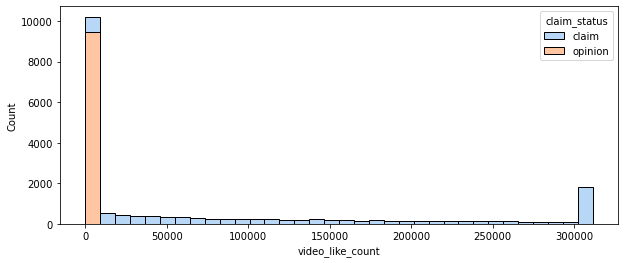

In [158]:
# Create a scatterplot of `video_view_count` versus `video_like_count` according to 'claim_status'

plt.figure(figsize=(10,4))
sns.histplot(data=df['video_view_count'], stat="count", multiple="stack", x=df["video_like_count"], kde=False, palette="pastel", 
             hue=df["claim_status"], element="bars", legend=True)

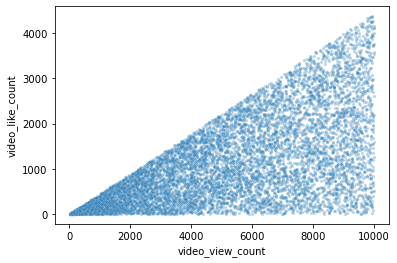

In [159]:
opinion = df[df['claim_status']=='opinion']
sns.scatterplot(x=opinion["video_view_count"], y=opinion["video_like_count"],
                 s=10, alpha=.3)
plt.show()

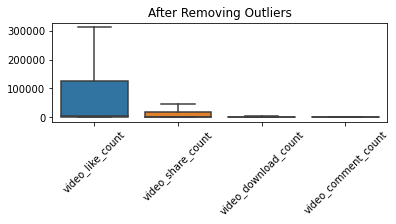

In [107]:
# Remove outlier and after that checked thruogh boxplot
#sns.boxplot(df['video_share_count'])
def plot_outliers(df, count_outlier):
    plt.subplot(2, 1, 2)
    sns.boxplot(data=df[count_outlier])
    plt.xticks(rotation=45)
    plt.title('After Removing Outliers')
    plt.show()
    
plot_outliers(df, count_outlier)

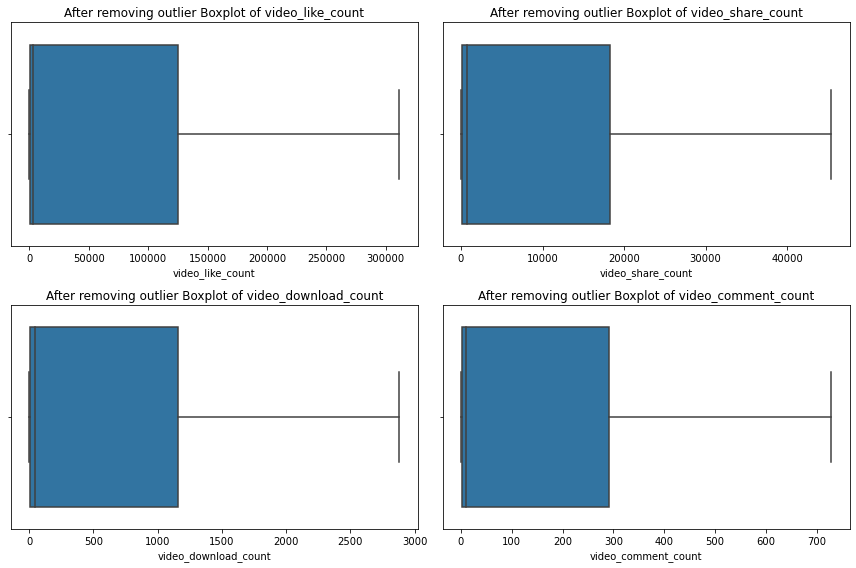

In [105]:
def plot_outliers(df, count_outlier):
    plt.figure(figsize=(12, 8))
    for idx, var in enumerate(count_outlier, start=1):
        plt.subplot(2, 2, idx)
        sns.boxplot(x=df[var])
        plt.title(f'After removing outlier Boxplot of {var}')
    plt.tight_layout()
    plt.show()
plot_outliers(df, count_outlier)

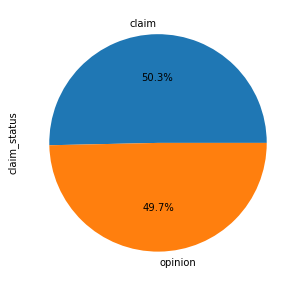

In [111]:
#Claim status by verification status:
plt.figure(figsize=(5,5))
df['claim_status'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

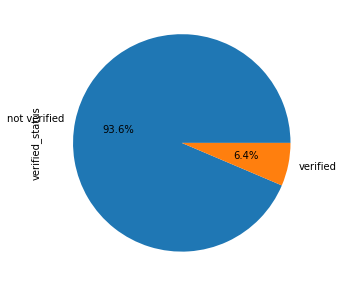

In [116]:
plt.figure(figsize=(5,5))
df['verified_status'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

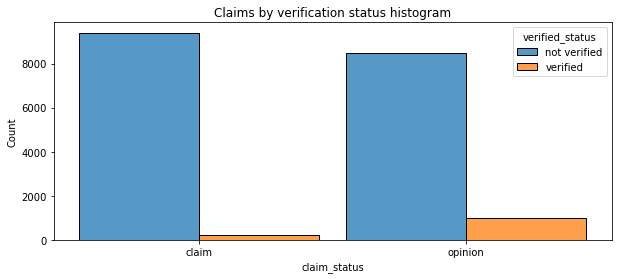

In [122]:
#Claim status by verification status:
plt.figure(figsize=(10,4))
sns.histplot(data=df, x='claim_status',hue='verified_status',multiple='dodge',shrink=0.9)
plt.title('Claims by verification status histogram')
plt.show()

Text(0.5, 1.0, 'claim status by author ban status')

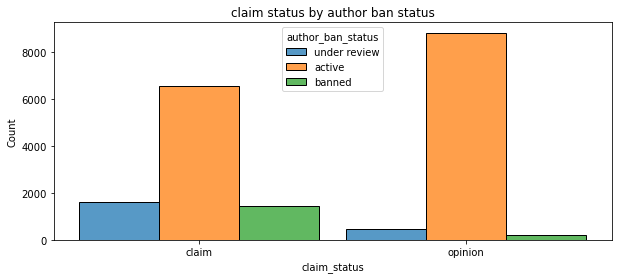

In [131]:
#Claim status by author ban status
ax=df['author_ban_status'].value_counts()
ax
plt.figure(figsize=(10,4))
sns.histplot(data=df,x='claim_status',hue='author_ban_status',shrink=0.9,multiple='dodge')
plt.title("claim status by author ban status")

#For both claims and opinions, there are many more active authors than banned authors or authors under review; 
#however, the proportion of active authors is far greater for opinion videos than for claim videos. 
#Again, it seems that authors who post claim videos are more likely to come under review and/or get banned

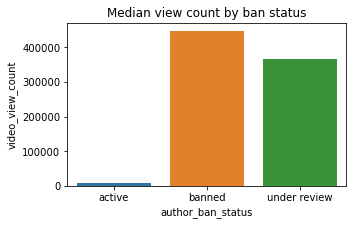

In [134]:
#### **Median view counts by ban status**

ban_status_counts = df.groupby(['author_ban_status']).median(numeric_only=True).reset_index()

fig = plt.figure(figsize=(5,3))
sns.barplot(data=ban_status_counts,x='author_ban_status',y='video_view_count')
plt.title('Median view count by ban status');

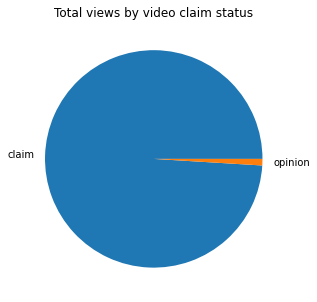

In [137]:
# Total views by claim status
df.groupby('claim_status')['video_view_count'].median()
fig = plt.figure(figsize=(5,5))
plt.pie(df.groupby('claim_status')['video_view_count'].sum(), labels=['claim', 'opinion'])
plt.title('Total views by video claim status');